In [52]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time

Some image examples: 
10_1473689520.jpg


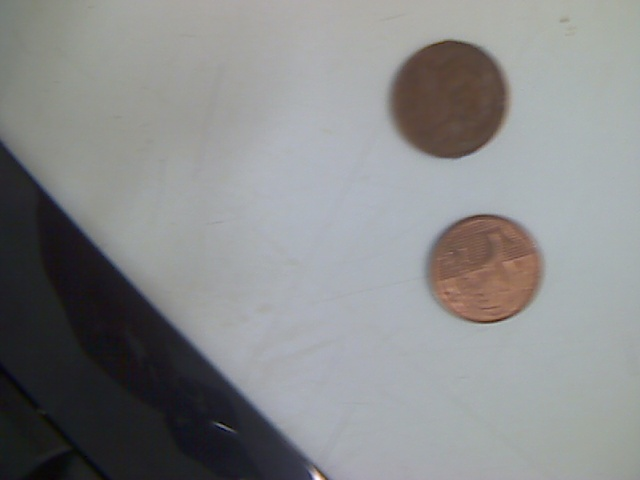

75_1474894518.jpg


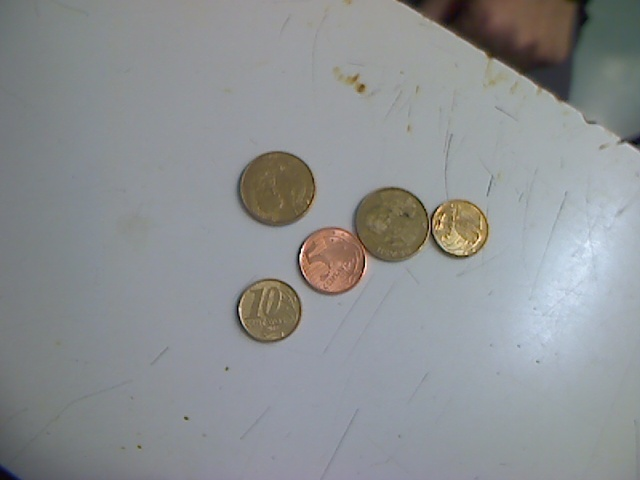

In [53]:
folder = "../data/deeplearning/all"
print("Some image examples: ")

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

for i in range(2):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i]))

In [54]:
train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))


from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#Medidas originais 
image_width = 640
image_height = 480
ratio = 4

image_width = 160
image_height = 120

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    #img = img.convert('L')
    # Transformando em Numpy Array
    x = img_to_array(img)  
    #print(x.shape)
    #x = x.reshape((1,) + x.shape)
    # Normalizando
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 100 == 0:
        print("%d images to array" % i)
    

Files in train_files: 612
100 images to array
200 images to array
300 images to array
400 images to array
500 images to array
600 images to array


In [55]:
from sklearn.cross_validation import train_test_split
#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)

In [58]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

model = Sequential()
model.add(Convolution2D(64, 3, 3, input_shape=(3, image_height, image_width)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('linear'))
model.add(Dropout(0.5))
model.add(Dense(1))


sgd = SGD(lr=0.01, decay=1e-7, momentum=.9)
    
#model.compile(loss='mse',
#              metrics=['accuracy'], optimizer='rmsprop')

model.compile(loss='mse', optimizer='adam')


model.fit(X_train, y_train, nb_epoch=15, batch_size=30,  validation_data=(X_test, y_test), verbose=1)

#model.load_weights(filename)

Train on 489 samples, validate on 123 samples
Epoch 1/15
489/489 [==============================] - 98s - loss: 8207.6762 - val_loss: 5270.3771
Epoch 2/15
489/489 [==============================] - 117s - loss: 5239.9056 - val_loss: 4760.0909
Epoch 3/15
489/489 [==============================] - 114s - loss: 4752.2452 - val_loss: 3706.7531
Epoch 4/15
489/489 [==============================] - 103s - loss: 3937.0657 - val_loss: 3380.3491
Epoch 5/15
489/489 [==============================] - 103s - loss: 3339.1767 - val_loss: 3211.2268
Epoch 6/15
489/489 [==============================] - 169s - loss: 3241.0118 - val_loss: 2936.8253
Epoch 7/15
489/489 [==============================] - 132s - loss: 2632.1767 - val_loss: 3234.4906
Epoch 8/15
489/489 [==============================] - 232s - loss: 2659.9362 - val_loss: 2690.8253
Epoch 9/15
489/489 [==============================] - 147s - loss: 2286.2999 - val_loss: 2632.1890
Epoch 10/15
489/489 [==============================] - 135s - lo

(faz tempo que esse link tá aqui, nem lembro mais se tinha algo importante)

http://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

### Resultados:
Imagem: normalizada, 160x120
Três épocas    
loss: 10092.9179 - val_loss: 12747.4773    
30 épocas  
loss: 17.9679 - val_loss: 3657.0876


In [59]:
start = time()
predictions = model.predict(X_test)
print("Tempo médio de previsão: {0:.2f}s".format((time() - start)/len(X_test)))

Tempo médio de previsão: 0.05s


In [60]:
print("{0:5} {1:10}".format("True", "Predicted"))
for i in range(len(predictions[:10])):
    print("{0:5} {1:10}".format(y_test[i], int(predictions[i][0])))

    #print predictions[:5].transpose()
#print y_test[:5]

True  Predicted 
   15          8
   95        135
   75         32
   50         25
   40         50
   50         11
  390        230
  390        130
   10         26
   20         35


In [61]:
### Fazendo com que previsoes sejam multiplos de 5
def closer_multiple(x, mult):
    value = mult * int(x / multi)
    if (x % multi) > multi/2.0:
        value += multi
    return value

multi = 5
predictions = [closer_multiple(x, multi) for x in predictions]

print("{0:5} {1:10}".format("True", "Predicted"))
for i in range(len(predictions[:10])):
    print("{0:5} {1:10}".format(y_test[i], int(predictions[i])))


True  Predicted 
   15         10
   95        135
   75         30
   50         25
   40         50
   50         10
  390        230
  390        130
   10         25
   20         35


In [22]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(input_dim = 1000, output_dim = 1000))
model.add(Activation('sigmoid'))
model.add(Dense(input_dim = 500, output_dim = 1))
model.add(Activation('linear'))

model.compile(loss='mse', optimizer='adam')

model.fit(X_train, y_train, nb_epoch=10, batch_size=5,  validation_data=(X_test, y_test), verbose=1)

Train on 296 samples, validate on 74 samples
Epoch 1/10
296/296 [==============================] - 127s - loss: 10421.7858 - val_loss: 10072.2231
Epoch 2/10
296/296 [==============================] - 179s - loss: 9171.9969 - val_loss: 9343.8601
Epoch 3/10
296/296 [==============================] - 215s - loss: 8634.6115 - val_loss: 8903.8012
Epoch 4/10
296/296 [==============================] - 203s - loss: 8237.8482 - val_loss: 8518.5890
Epoch 5/10
296/296 [==============================] - 219s - loss: 7866.0203 - val_loss: 8176.0744
Epoch 6/10
130/296 [============>.................] - ETA: 116s - loss: 10180.5608

KeyboardInterrupt: 

In [ ]:
start = time()
predictions = model.predict(X_test)
print("Tempo médio de previsão: {0:.2f}s".format((time() - start)/len(X_test)))
print("{0:5} {1:10}".format("True", "Predicted"))
for i in range(len(predictions[:10])):
    print("{0:5} {1:10}".format(y_test[i], int(predictions[i][0])))
